# Augmenting a dataset for instance segmentation

In this notebook, we illustrate how CLODSA can be employed to augment a dataset of images devoted to instance segmentation that was annotated using the [COCO format](http://cocodataset.org/#home). 

*Delete old directories (comment out as needed):*

In [ ]:
import shutil
shutil.rmtree('/content/output')
shutil.rmtree('/content/input')

*Mount Google Drive to copy contents:*

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


*Copy the images + annotations into the input folder:*

In [ ]:
!cp -R /content/drive/MyDrive/Law_Game/Law_Game_Annotated_Data/thanos_skidmarks/train_126/images /content/input
!cp /content/drive/MyDrive/Law_Game/Law_Game_Annotated_Data/thanos_skidmarks/train.json /content/input/annotations.json

Ensure that the input folder contains the following:
- images to be augmented
- a single json file in COCO format that corresponds to the image annotations

In [ ]:
!ls input/

 0d652d0b91f8e4ae721616eedf04a4cc.jpeg
 1366_2000.png
 13979925543_39a1008314_k.jpg
 1449353170_9c848bb01d_o.jpg
 145119692_dfbf73ff19_o.jpg
 1517678532_b735135f0c_k.jpg
 1548107502_8c11984fe6_o.jpg
 1571950054_13d31abdb2_o.jpg
 18777850982_de0a7a9b77_o.jpg
 19164832099_b6b43d545e_o.jpg
'2022_4$largeimg_239735981.jpeg'
 21763635585D432513.jpeg
 2191973788_c27b7c6988_h.jpeg
 2322536270_7774f18278_o.jpg
 240_F_139647203_QeCsBtAJVs6yPJs1sQK2ZArCXji0g67x.jpeg
 240_F_353933083_RennFlJU3g6M1FJ56Ba2cot8IHZAnjv4.jpeg
 2426340939_d74688498c_k.jpg
 28832788398_9c547dd667_k.jpg
 29302610137_d5da5faabd_k.jpg
 346222e51f35ea504475c9149fa547df_signpost-half.png
 3564006446_1cc479524e_b.jpeg
 3571649227_aacc40bcbe_o.jpg
 360_F_174703485_agQHoBfSBl5GGpVb21XKJjJ948FICQsd.jpeg
 360_F_197833533_o2UgF9mK4wWuhLjkkFvzzLlI67xLV0J9.webp
 360_F_248672442_aDbhARKPR8yrsANzB8zM8IUW8II0fAo5.jpeg
 360_F_301972782_C1OOYlaqmigzRftCTBWHBII17xmoFKHI.jpeg
 360_F_428990817_7sdqFoKEIzDhFdOQ.jpeg
 360_F_73987482_Ft4nm7WxZC

We create the output folder.

In [ ]:
!mkdir output

## Augmentation techniques

For this example, we consider three augmentation techniques. 

The augmentation techniques applied in this example are:
- Rotation
- Flip
- Dropout
- Elastic Deformation
- Equalize Histogram
- Gamma Correction
- Gaussian Blurring
- Gaussian Noise
- Median Blurring
- Raise Blue Channel
- Raise Green Channel
- Raise Hue
- Salt and Pepper


## Installing the necessary libraries

In case that CLODSA is not installed in your system, the first task consists in installing it using ``pip``.

In [ ]:
!pip install clodsa

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Loading the necessary libraries

The first step in the pipeline consists in loading the necessary libraries to apply the data augmentation techniques in CLODSA.

In [ ]:
from matplotlib import pyplot as plt
from clodsa.augmentors.augmentorFactory import createAugmentor
from clodsa.transformers.transformerFactory import transformerGenerator
from clodsa.techniques.techniqueFactory import createTechnique
import cv2
%matplotlib inline

## Creating the augmentor object

As explained in the documentation of CLODSA, we need to specify some parameters for the augmentation process, and use them to create an augmentor object.  

_The kind of problem_. In this case, we are working in an instance segmentation problem.

In [ ]:
PROBLEM = "instance_segmentation"

_The annotation mode_. The annotation is provided using the coco format in a file called annotations.json. 

In [ ]:
ANNOTATION_MODE = "coco"

_The input path_. The input path containing the images. 

In [ ]:
INPUT_PATH = "input"

_The generation mode_. In this case, linear, that is, all the augmentation techniques are applied to all the images of the original dataset. 

In [ ]:
GENERATION_MODE = "linear"

_The output mode_. The generated images will be stored in a new folder called output.  

In [ ]:
OUTPUT_MODE = "coco"
OUTPUT_PATH= "output/"

Using the above information, we can create our augmentor object. 

In [ ]:
augmentor = createAugmentor(PROBLEM,ANNOTATION_MODE,OUTPUT_MODE,GENERATION_MODE,INPUT_PATH,{"outputPath":OUTPUT_PATH})

## Adding the augmentation techniques

Now, we define the techniques that will be applied in our augmentation process and add them to our augmentor object. To illustrate the transformations, we will use the following image of the dataset. 



First of all, we must define a transformer generator.

In [ ]:
transformer = transformerGenerator(PROBLEM)

_Rotation:_

In [ ]:
for angle in [90,180]:
    rotate = createTechnique("rotate", {"angle" : angle})
    augmentor.addTransformer(transformer(rotate))

_Flip:_

In [ ]:
flip = createTechnique("flip",{"flip":1})
augmentor.addTransformer(transformer(flip))

*Dropout:*

In [ ]:
dropout = createTechnique("dropout",{"percentage":0.05})
augmentor.addTransformer(transformer(dropout))

*Elastic Deformation:*

In [ ]:
elastic = createTechnique("elastic",{"alpha":5,"sigma":0.05})
augmentor.addTransformer(transformer(elastic))

*Equalize Histogram:*

In [ ]:
histograms = createTechnique("equalize_histogram",{})
augmentor.addTransformer(transformer(histograms))

*Gamma Correction:*

In [ ]:
gamma = createTechnique("gamma",{"gamma":1.5})
augmentor.addTransformer(transformer(gamma))

*Gaussian Blurring:*

In [ ]:
gaussian_blurring = createTechnique("gaussian_blur", {"kernel" : 5})
augmentor.addTransformer(transformer(gaussian_blurring))

*Gaussian Noise:*

In [ ]:
gaussian_noise = createTechnique("gaussian_noise", {"mean" : 0,"sigma":10})
augmentor.addTransformer(transformer(gaussian_noise))

*Raise Hue:*

In [ ]:
raise_hue = createTechnique("raise_hue", {"power" : 0.9})
augmentor.addTransformer(transformer(raise_hue))

*Salt and Pepper:*

In [ ]:
salt_and_pepper = createTechnique("salt_and_pepper", {"low" : 0,"up":25})
augmentor.addTransformer(transformer(salt_and_pepper))

## Applying the augmentation process

Finally, we apply the augmentation process (this might take some time depending on the number of images of the original dataset and the number of transformations that will be applied). 

Warning: in case of info error, edit annotations.json and add the following:


```
"info": {
    "description": "Example Dataset",
    "version": "0.1.0",
    "year": 2022,
    "contributor": "your name"
  },
  "licenses": [
    {
      "id": 1,
      "name": "",
      "url": ""
    }
  ],
```



In [ ]:
augmentor.applyAugmentation()

/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:703: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


We can now check the amount of files of the output folder (includes both images and the annotations.json)

In [ ]:
!ls output/ | wc -l

1387


Finally, we can visualize the results using some of the tools provided by [the COCO API](https://github.com/cocodataset/cocoapi).

In [ ]:
!pip install pycocotools

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
%matplotlib inline
from pycocotools.coco import COCO
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
import pylab

In [ ]:
image_directory = 'output/'
annotation_file = 'output/annotation.json'

In [ ]:
example_coco = COCO(annotation_file)

loading annotations into memory...
Done (t=0.39s)
creating index...
index created!


In [ ]:
categories = example_coco.loadCats(example_coco.getCatIds())
category_names = [category['name'] for category in categories]
print('Custom COCO categories: \n{}\n'.format(' '.join(category_names)))

category_names = set([category['supercategory'] for category in categories])
print('Custom COCO supercategories: \n{}'.format(' '.join(category_names)))

Custom COCO categories: 
skidmark

Custom COCO supercategories: 
skidmark


The following data cells pick a random processed image for preview, 
and they're not required for the correct use of the application.

Comment them out if you want to see a random image from the output images.

In [ ]:
# category_ids = example_coco.getCatIds(catNms=['circle'])
# image_ids = example_coco.getImgIds(catIds=category_ids)
# image_data = example_coco.loadImgs(image_ids[np.random.randint(0, len(image_ids))])[0]

In [ ]:
# image_data

{'id': 921,
 'file_name': '7_depositphotos_10028386-stock-photo-tire-skid-marks.jpeg',
 'width': 600,
 'height': 398,
 'date_captured': '',
 'license': 1,
 'coco_url': '',
 'flickr_url': ''}

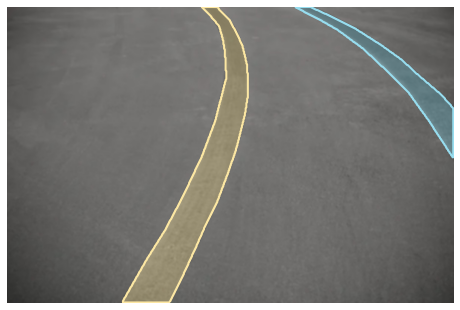

In [ ]:
# image = io.imread(image_directory + image_data['file_name'])
# plt.imshow(image); plt.axis('off')
# pylab.rcParams['figure.figsize'] = (8.0, 10.0)
# annotation_ids = example_coco.getAnnIds(imgIds=image_data['id'], catIds=category_ids, iscrowd=None)
# annotations = example_coco.loadAnns(annotation_ids)
# example_coco.showAnns(annotations)

If you are executing this notebook in Colaboratory, you need to download the generated files. To that aim, you can create a zip folder and download it using the following commands. 

In [ ]:
!zip -r output.zip output

  adding: output/ (stored 0%)
  adding: output/7_GettyImages-502376113-scaled-1.webp (deflated 2%)
  adding: output/1_GettyImages-502376113-scaled-1.webp (deflated 0%)
  adding: output/2_GettyImages-502376113-scaled-1.webp (deflated 0%)
  adding: output/0_GettyImages-502376113-scaled-1.webp (deflated 0%)
  adding: output/4_GettyImages-502376113-scaled-1.webp (deflated 0%)
  adding: output/10_GettyImages-502376113-scaled-1.webp (deflated 0%)
  adding: output/3_GettyImages-502376113-scaled-1.webp (deflated 0%)
  adding: output/8_GettyImages-502376113-scaled-1.webp (deflated 0%)
  adding: output/9_GettyImages-502376113-scaled-1.webp (deflated 0%)
  adding: output/6_GettyImages-502376113-scaled-1.webp (deflated 0%)
  adding: output/annotation.json (deflated 87%)
  adding: output/5_GettyImages-502376113-scaled-1.webp (deflated 0%)
